### Implement AlexNet (Deep Learning Model) from Scratch

In [1]:
# Importing other libraries
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv2D, Dropout, MaxPooling2D, BatchNormalization, Activation, Flatten, Dense

import numpy as np
import os

np.random.seed(1000)

In [2]:
# Creating a Sequential model
model = Sequential()

# 1st Convolution Layer
model.add(Conv2D(filters=96, kernel_size=(11,11), input_shape=(227, 227, 3), strides=(4,4), padding='valid'))
# Normalization
model.add(BatchNormalization())
# Activation Function
model.add(Activation('relu'))
# Max-Pooling
model.add(MaxPooling2D((3,3), strides=(2,2), padding='valid'))

# 2nd Convolution Layer
model.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding='same'))
# Normalization
model.add(BatchNormalization())
# Activation Function
model.add(Activation('relu'))
# Max-Pooling
model.add(MaxPooling2D((3,3), strides=(2,2), padding='valid'))

# 3rd Convolution Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), padding='same'))
# Normalization
model.add(BatchNormalization())
# Activation Function
model.add(Activation('relu'))

# 4th Convolution Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), padding='same'))
# Normalization
model.add(BatchNormalization())
# Activation Function
model.add(Activation('relu'))

# 5th Convolution Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
# Normalization
model.add(BatchNormalization())
# Activation Function
model.add(Activation('relu'))
# Max-Pooling
model.add(MaxPooling2D((3,3), strides=(2,2), padding='valid'))

# Flattening before passing to the Dense layer
model.add(Flatten())

# 1st Dense Layer
model.add(Dense(4096))
# Dropout
model.add(Dropout(0.5))
# Normalization
model.add(BatchNormalization())
# Activation Function
model.add(Activation('relu'))

# 2nd Dense Layer
model.add(Dense(4096))
# Dropout
model.add(Dropout(0.5))
# Normalization
model.add(BatchNormalization())
# Activation Function
model.add(Activation('relu'))

# Output softmax Layer
model.add(Dense(6))
# Activation Function
model.add(Activation('softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 55, 55, 96)        34944     
_________________________________________________________________
batch_normalization (BatchNo (None, 55, 55, 96)        384       
_________________________________________________________________
activation (Activation)      (None, 55, 55, 96)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 27, 27, 256)       614656    
_________________________________________________________________
batch_normalization_1 (Batch (None, 27, 27, 256)       1024      
_________________________________________________________________
activation_1 (Activation)    (None, 27, 27, 256)       0

In [3]:
# Compiling
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [4]:
# Import NumPy arrays and Load
from sklearn.model_selection import train_test_split

data=np.load('./NPY/images.npy')
target=np.load('./NPY/target.npy')

x_train,x_test,y_train,y_test=train_test_split(data,target,test_size=0.3)

In [5]:
# Training the model
callback = [
    tf.keras.callbacks.EarlyStopping(
        monitor="val_loss",
        mode="auto",
        restore_best_weights=True,
        patience=3
    ),
    tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5'),
    tf.keras.callbacks.TensorBoard(log_dir='./logs')
]

hist = model.fit(x_train, y_train, batch_size=75, epochs=15, verbose=1, validation_split=0.2, shuffle=True, callbacks = [callback])

Epoch 1/15
116/116 [==============================] - 561s 5s/step - loss: 2.2291 - accuracy: 0.7224 - val_loss: 1149.5769 - val_accuracy: 0.2378
Epoch 2/15
116/116 [==============================] - 557s 5s/step - loss: 0.5777 - accuracy: 0.8439 - val_loss: 3.2340 - val_accuracy: 0.7858
Epoch 3/15
116/116 [==============================] - 557s 5s/step - loss: 0.3026 - accuracy: 0.8926 - val_loss: 26.7405 - val_accuracy: 0.4562
Epoch 4/15
116/116 [==============================] - 568s 5s/step - loss: 0.3089 - accuracy: 0.9227 - val_loss: 0.2199 - val_accuracy: 0.9133
Epoch 5/15
116/116 [==============================] - 592s 5s/step - loss: 0.2041 - accuracy: 0.9574 - val_loss: 0.4143 - val_accuracy: 0.8461
Epoch 6/15
116/116 [==============================] - 617s 5s/step - loss: 0.2408 - accuracy: 0.9580 - val_loss: 0.2271 - val_accuracy: 0.9462
Epoch 7/15
116/116 [==============================] - 588s 5s/step - loss: 0.1143 - accuracy: 0.9801 - val_loss: 29.4550 - val_accuracy: 0

In [6]:
#Defining function for confusion matrix plot
import matplotlib.pyplot as plt  

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=True,
                          title=None,
                          cmap=plt.cm.Blues):
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

#Print Confusion matrix
    fig, ax = plt.subplots(figsize=(7,7))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

np.set_printoptions(precision=2)

C:\Users\my\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Normalized confusion matrix


<AxesSubplot:title={'center':'Confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

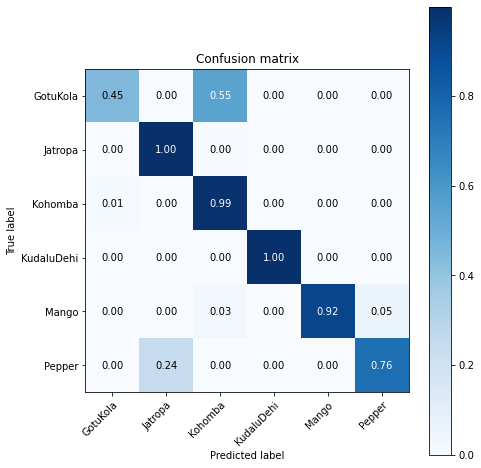

In [7]:
#Making prediction
y_pred=model.predict_classes(x_test)
y_true=np.argmax(y_test,axis=1)

#Plotting the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_mtx=confusion_matrix(y_true,y_pred)

class_names=['GotuKola', 'Jatropa', 'Kohomba', 'KudaluDehi', 'Mango', 'Pepper']

# Plotting non-normalized confusion matrix
plot_confusion_matrix(y_true, y_pred, classes = class_names,title = 'Confusion matrix')


In [8]:
#Classification accuracy
from sklearn.metrics import accuracy_score
acc_score = (accuracy_score(y_true, y_pred))*100
print('Accuracy Score = ', acc_score)

Accuracy Score =  90.67704953493403


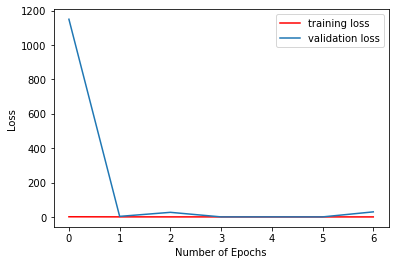

In [10]:
plt.plot(hist.history['loss'],'r',label='training loss')
plt.plot(hist.history['val_loss'],label='validation loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [13]:
import os

import tensorflow as tf
from tensorflow import keras

model.save('Model/Alexnet.h5')

In [14]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred, target_names=class_names))

              precision    recall  f1-score   support

    GotuKola       0.97      0.45      0.62       529
     Jatropa       0.98      1.00      0.99      1281
     Kohomba       0.50      0.99      0.66       328
  KudaluDehi       1.00      1.00      1.00      1152
       Mango       1.00      0.92      0.96      1205
      Pepper       0.61      0.76      0.67       128

    accuracy                           0.91      4623
   macro avg       0.84      0.85      0.82      4623
weighted avg       0.94      0.91      0.91      4623



In [15]:
%tensorboard --logdir logs

UsageError: Line magic function `%tensorboard` not found.
